> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** %s
* **Matrícula:**  %d

# Aula Prática 09
## Aprendizado Supervisionado
**Objetivo:** Utilizar a biblioteca scikit-learn para treinar e testar modelos de aprendizado supervisionado \\
**Pré-requisitos:** Linguagem de programação Python, Linux, estatística \\
**Meta**: Ao final da prática, o aluno será capaz de preparar dados e criar modelos de classificação

In [2]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p9/weatherHistory.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for learntools-dados-ufv: filename=learntools_dados_ufv-1.0.9-py3-none-any.whl size=35978 sha256=28934c4c057cc9dcd79b71c0d25822fedf678ff7074b54eeb5563a96acce3b71
  Stored in directory: /tmp/pip-ephem-wheel-cache-7kq6c2h1/wheels/98/7e/ce/0e4d187f24e2a29c7a8e322da422ebb5582d67363b0fdca411
Successfully built learntools-dados-ufv
--2022-07-18 00:57:05--  https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p9/weatherHistory.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16294377 (16M) [text/plain]
Saving to: ‘weatherHistory.csv’

weatherHistory.csv  100%[===================>]  15.54M  --.-KB/s    in 0.1s    

2022-07-18 00:57:06 (

In [3]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from learntools_dados_ufv.core import binder; binder.bind(globals())
from learntools_dados_ufv.ccf425.pratica_9 import *

print("Setup complete.")

Setup complete.


------
## Roteiro

### Ler o conjunto de dados
O conjunto de dados que iremos utilizar é o **iris dataset**, que é um dataset clássico no treinamento em Inteligência Artificial. Os dados estão disponíveis diretamente na biblioteca `scikit-learn`.

In [ ]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], ['target']))

# Converte a coluna target para int
iris_df['target'] = iris_df['target'].astype('int64')

### Visualizar os dados

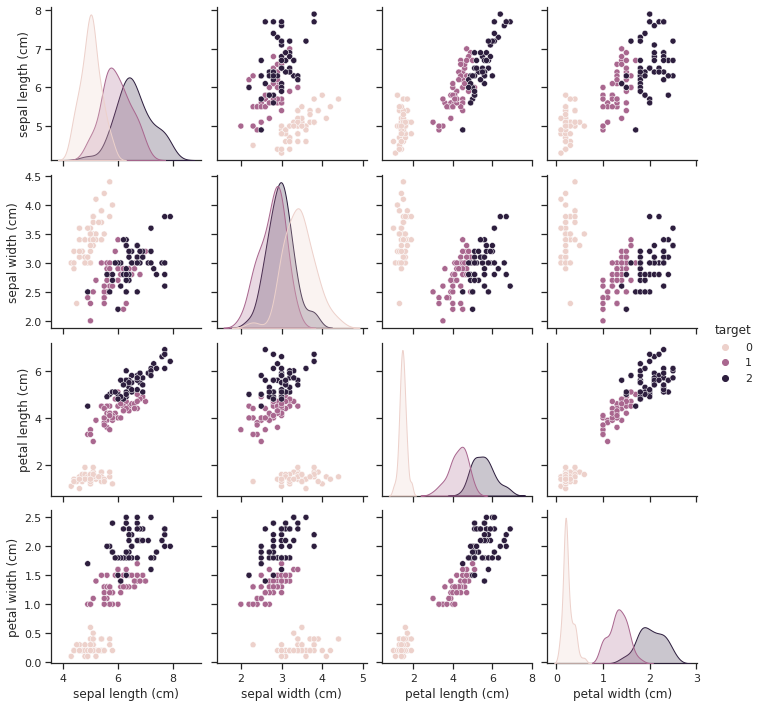

In [ ]:
sns.set(style='ticks')
sns.pairplot(iris_df, hue='target')
plt.show()

### Separar o conjunto de dados em treinamento e testes

In [ ]:
iris_df_X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
iris_df_Y = iris_df['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']],
    iris_df['target'],
    test_size=0.2,
    random_state=0
)

### Aplicar o KNN para treinar um modelo

Além disso, classificar os exemplos de testes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

knn_Y_predicted = knn.predict(X_test)
knn_accuracy = np.sum(knn_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * knn_accuracy))

Acurácia: 96.67%


### Aplicar o SVM para treinar um modelo

... e classificar os exemplos de testes...

In [ ]:
from sklearn import svm

svm = svm.SVC(kernel='linear', probability=True)
svm.fit(X_train, Y_train)

svm_Y_predicted = svm.predict(X_test)
svm_accuracy = np.sum(svm_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * svm_accuracy))

Acurácia: 100.00%


#### Calcular a precisão e revogação...

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

print("KNN (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, knn_Y_predicted, average=None)

KNN (precisão, revogação, fscore)


(array([1.        , 1.        , 0.85714286]),
 array([1.        , 0.92307692, 1.        ]),
 array([1.        , 0.96      , 0.92307692]),
 array([11, 13,  6]))

In [ ]:
print("SVM (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, svm_Y_predicted, average=None)

SVM (precisão, revogação, fscore)


(array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([11, 13,  6]))

#### Calcular a Validação Cruzada...

In [ ]:
from sklearn.model_selection import cross_val_score


scores_knn = cross_val_score(knn, iris_df_X, iris_df_Y, cv=5)
print('Acurácia KNN: {:.2f} (± {:.2f})'.format(scores_knn.mean(), scores_knn.std() * 2))

scores_svm = cross_val_score(svm, iris_df_X, iris_df_Y, cv=5)
print('Acurácia SVM: {:.2f} (± {:.2f})'.format(scores_svm.mean(), scores_svm.std() * 2))

Acurácia KNN: 0.97 (± 0.05)
Acurácia SVM: 0.98 (± 0.03)


----
# Atividades

Utilizar o conjunto de dados weatherHistory.csv, que contém o histórico de variáveis relacionadas ao clima da cidade de Szede, Hungria, entre 2006 e 2016.

Utilize técnicas de aprendizado de máquina supervisionado para criar modelos para prever o tipo de precipitação (Precip Type) de acordo com outras variáveis. Teste pelo menos três algoritmos e responda:

## 1. Leia o arquivo `weatherHistory.csv`
Armazene-os nas variável `df`. 

Chame a função `q1.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q1.hint()`

In [4]:
# q1.hint()

df = pd.read_csv('./weatherHistory.csv')
print(df['Precip Type'].unique())

q1.check()
#Transformando em atributo numérico apra evitar erro em questões posteriores
df['Precip Type'] = df["Precip Type"].astype('category')
df['Precip Type'] = df['Precip Type'].cat.codes

df['Summary'] = df["Summary"].astype('category')
df['Summary'] = df['Summary'].cat.codes

df['Daily Summary'] = df["Daily Summary"].astype('category')
df['Daily Summary'] = df['Daily Summary'].cat.codes
df.columns

['rain' 'snow' nan]


<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

## 2. Divida o conjunto de treinamento (70% das instâncias) e de teste (30% das instâncias)

Utilize uma amostragem aleatória (pesquise um parâmetro que realize isso).

Armazene os dados nas seguintes variáveis:
- `X_train` - Conjunto de atributos de entrada para treinamento
- `Y_train` - Conjunto de saída para treinamento
- `X_test` - Conjunto de atributos de entrada para teste
- `Y_test` - Conjunto de saída para teste

Chame a função `q2.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q2.hint()`

In [5]:
# q2.hint()

X_train, X_test, Y_train, Y_test = train_test_split(
    df[['Summary', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary']],
    df['Precip Type'],
    test_size=0.3,
    random_state=0
)

q2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



## 3. Faça uma análise simples da distribuição dos dados de Precipitação
Analise se os dados seguem uma distribuição normal ou não, se é contínuo ou não, etc. Talvez com 1 ou 2 gráficos você consiga tirar toda a informação necessária.

Tente extrair as informações fundamentais para **escolher um modelo de aprendizado de máquina supervisionado** ideal.

Essa questão não possui verificação automática mas você pode pedir dicas com `q3.hint()`

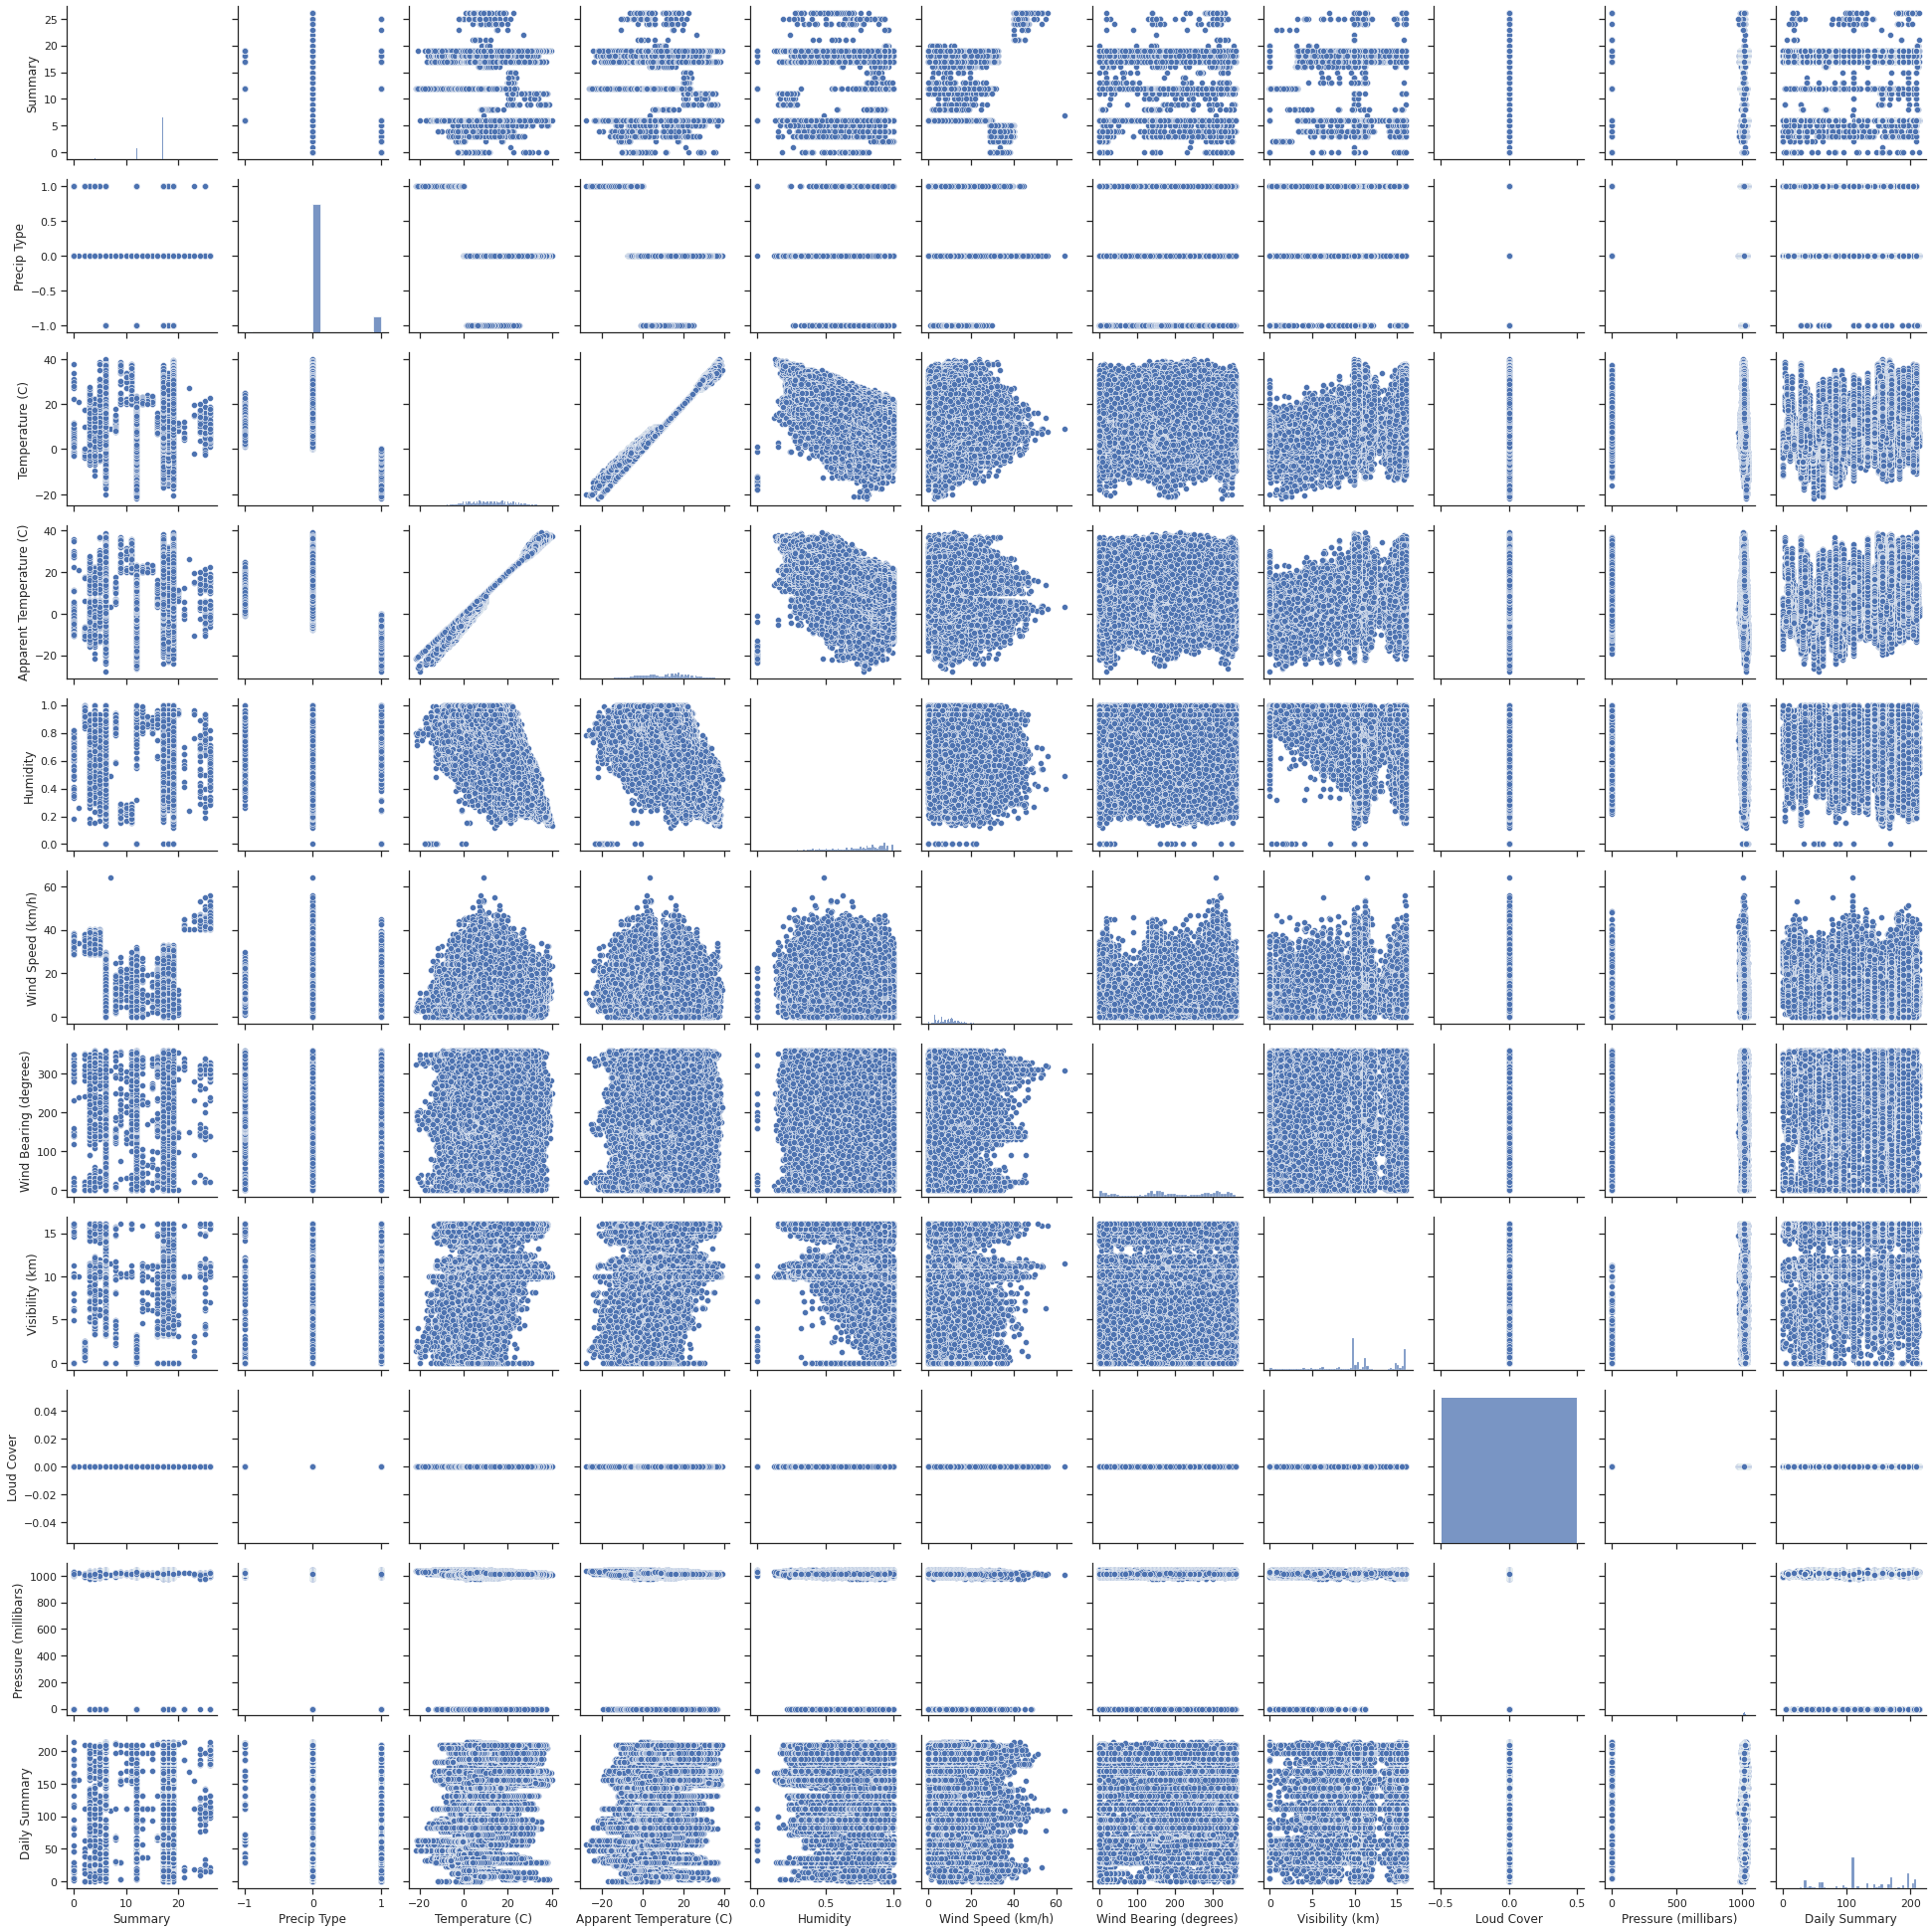

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 1:</span> Faça um plot de distribuição com a coluna de interesse (Y).
(Para outra dica, chame `.hint(2)`)

In [ ]:
# Resposta da 3

sns.pairplot(df)
plt.show()

q3.hint()


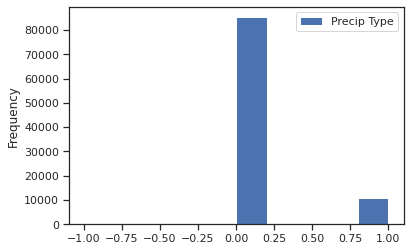

In [ ]:
df[['Precip Type']].plot(kind = 'hist')

Conclui-se que precipitação consiste em dados categóricos (não contínuos). Dessa forma, para observar melhor sua distribuição, relacionou os dados com dados numéricos de outras colunas. Entende-se que a precipitação não segue uma distribuição normal.

## 4. Utilize técnicas de aprendizado de máquina **supervisionado** para prever o tipo de precipitação
Utilize técnicas de aprendizado de máquina supervisionado para criar modelos para prever o tipo de precipitação (Precip Type) de acordo com outras variáveis. 

Analise o conjunto de dadoTeste pelo menos três algoritmos. Escolha os que você julgar mais adequado e justifique porque o escolheu (uma frase curta, não precisa se aprofundar... tente aplicar os conhecimentos teóricos sobre cada modelo)


É esperado que você preencha uma célula de markdown descrevendo o método e o porquê o escolheu, e uma célula de código que faça o treinamento (`fit`) do modelo.

Essa questão não possui verificação automática mas você pode pedir dicas com `q4.hint()`

In [ ]:
q4.hint(3)

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 3:</span> Instancie o modelo e faça o treinamento passando apenas o conjunto de treinamento.

### Resposta da 4: - Modelo 1

**Modelo:** KNN

**Justificativa:** Como não foi possível definir exatamente se a dsitribuição de Precip Type devida a sua natureza categórica, utiliza-se o KNN pois não há essa demanda.

In [56]:
# Resposta da 4: - Modelo 1
# Faça o modelo do primeiro modelo da 4. aqui!
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

knn_Y_predicted = knn.predict(X_test)
knn_accuracy = np.sum(knn_Y_predicted == Y_test) / len(Y_test)

### Resposta da 4: - Modelo 2

**Modelo:** Árvore de decisão

**Justificativa:** Como o algoritmo de árvore de decisão avalia atributos categóricos e numéricos, utiliza-se ele a fim de obter resultados onde o tipo de precipitação pode prever os atributos numéricos.

In [57]:
# Resposta da 4: - Modelo 2
# Faça o modelo do segundo modelo da 4. aqui!
from sklearn import tree

dtc=tree.DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

dtc_Y_predicted = dtc.predict(X_test)

### Resposta da 4: - Modelo 3

**Modelo:** SVM

**Justificativa:** Como este algoritmo avalia bem dados que não são lineares, e considerando que a distribuição do tipo de precipitação não é contínua e nem linear, escolheu-se esse algoritmo para aplicar os dados.

In [58]:
# Resposta da 4: - Modelo 3
# Faça o modelo do terceiro modelo da 4. aqui!
from sklearn import svm

svm = svm.SVC(kernel='linear')
svm.fit(X_train, Y_train)

svm_Y_predicted = svm.predict(X_test)

## 5. Calcule estatísticas para cada algoritmo escolhido
Calcule a acurácia, precisão e revocação para cada rótulo (tipo de precipitação) para cada algoritmo testado.

É esperado que você preencha a tabela markdown abaixo com os resultados.

Essa questão não possui verificação automática mas você pode pedir dicas com `q5.hint()`

### Algoritmo 1

**Nome:** KNN

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
| Chuva 	                |    97%    |    98%   	|    99%    	|
| Neve 	                  |    97%   	|    90%   	|    83%    	|
| NaN 	                  |    97%   	|    78%   	|    40%    	|

In [9]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 1. 
from sklearn.metrics import classification_report
print(np.sum(knn_Y_predicted == Y_test) / len(Y_test))
print(classification_report(Y_test,knn.predict(X_test)))
q5.hint()

0.9675490738180813
              precision    recall  f1-score   support

          -1       0.78      0.40      0.53       159
           0       0.98      0.99      0.98     25583
           1       0.90      0.83      0.87      3194

    accuracy                           0.97     28936
   macro avg       0.89      0.74      0.79     28936
weighted avg       0.97      0.97      0.97     28936



<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 1:</span> Visite o roteiro para ver como é calculado a acurácia, precisão e revogação.
(Para outra dica, chame `.hint(2)`)

### Algoritmo 2

**Nome:** Árvore de decisão

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
| Chuva 	                |   100%    |   100%   	|   100%    	|
| Neve 	                  |   100%   	|   100%   	|   100%    	|
| NaN 	                  |   100%   	|    59%   	|    57%    	|

In [10]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 2. 
print(np.sum(dtc_Y_predicted == Y_test) / len(Y_test))
print(classification_report(Y_test,dtc.predict(X_test)))
q5.hint()

0.9955073265136853
              precision    recall  f1-score   support

          -1       0.60      0.55      0.58       159
           0       1.00      1.00      1.00     25583
           1       1.00      1.00      1.00      3194

    accuracy                           1.00     28936
   macro avg       0.87      0.85      0.86     28936
weighted avg       1.00      1.00      1.00     28936



<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 1:</span> Visite o roteiro para ver como é calculado a acurácia, precisão e revogação.
(Para outra dica, chame `.hint(2)`)

### Algoritmo 3

**Nome:** SVM

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
| Chuva 	                |    99%    |    99%   	|   100%    	|
| Neve 	                  |    99%   	|    99%   	|   100%    	|
| NaN 	                  |    99%   	|    0%   	|    0%    	  |

In [11]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 3. 
print(np.sum(svm_Y_predicted == Y_test) / len(Y_test))
print(classification_report(Y_test,svm.predict(X_test)))
q5.hint()

0.9932264307437103
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       159
           0       0.99      1.00      1.00     25583
           1       0.99      1.00      0.99      3194

    accuracy                           0.99     28936
   macro avg       0.66      0.67      0.66     28936
weighted avg       0.99      0.99      0.99     28936



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 1:</span> Visite o roteiro para ver como é calculado a acurácia, precisão e revogação.
(Para outra dica, chame `.hint(2)`)

## 6.  É possível melhorar o algoritmo se forem selecionados alguns atributos em particular, ao invés de utilizar todos?
Descreva sua resposta para cada um dos algoritmos. Utilize evidências empíricas, se achar conveniente.

Essa questão não possui verificação automática mas você pode pedir dicas com `q6.hint()`

In [16]:
q6.hint(4)

updated_models = ...

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 4:</span> Experimente o treinamento do modelo tratando antes os dados de alguma maneira.

#### Algoritmo 1 - KNN

In [52]:
X_uptrain, X_uptest, Y_uptrain, Y_uptest = train_test_split(
    df[['Summary', 'Temperature (C)',
       'Apparent Temperature (C)', 'Wind Speed (km/h)', 'Visibility (km)', 'Daily Summary']],
    df['Precip Type'],
    test_size=0.3,
    random_state=0
)

knn = KNeighborsClassifier()
knn.fit(X_uptrain, Y_uptrain)

knn_Y_uppredicted = knn.predict(X_uptest)

print(np.sum(knn_Y_uppredicted == Y_uptest) / len(Y_uptest))
print(classification_report(Y_uptest,knn.predict(X_uptest)))

0.9831351949129112
              precision    recall  f1-score   support

          -1       0.76      0.32      0.45       159
           0       0.99      0.99      0.99     25583
           1       0.95      0.94      0.94      3194

    accuracy                           0.98     28936
   macro avg       0.90      0.75      0.79     28936
weighted avg       0.98      0.98      0.98     28936



Ao retirar 'Wind Bearing', 'Humidity', 'Loud Cover' e 'Pressure' o KNN apresentou um desempenho melhor. Esses atributos não têm muita variação, dessa forma, podem ser mais complicados de se examinar para definir padrões, uma vez que não apresnetam padrões muito claros.

#### Algoritmo 2 -  Árvore de decisão

In [51]:
X_uptrain, X_uptest, Y_uptrain, Y_uptest = train_test_split(
    df[['Summary', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary']],
    df['Precip Type'],
    test_size=0.3,
    random_state=0
)

dtc=tree.DecisionTreeClassifier()
dtc.fit(X_uptrain,Y_uptrain)

dtc_Y_uppredicted = dtc.predict(X_uptest)

print(np.sum(dtc_Y_uppredicted == Y_uptest) / len(Y_uptest))
print(classification_report(Y_uptest,dtc.predict(X_uptest)))

0.9952654133259607
              precision    recall  f1-score   support

          -1       0.57      0.56      0.57       159
           0       1.00      1.00      1.00     25583
           1       1.00      1.00      1.00      3194

    accuracy                           1.00     28936
   macro avg       0.86      0.85      0.85     28936
weighted avg       1.00      1.00      1.00     28936



Ao examinar o algoritmo de decisão sem diversos atributos, entende-se que todos os atributos ajudam o algoritmo a prever o valo do tipo de precipitação. Isso está ligado ao fato do algoritmo tomar decisões baseados em atributos do conjunto de dados, então quando mais informação melhor.

#### Algoritmo 2 -  SVM

In [50]:
X_uptrain, X_uptest, Y_uptrain, Y_uptest = train_test_split(
    df[['Summary', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary']],
    df['Precip Type'],
    test_size=0.3,
    random_state=0
)

svmup = svm.SVC(kernel='linear')
svmup.fit(X_uptrain, Y_uptrain)

svm_Y_uppredicted = svm.predict(X_uptest)

print(np.sum(svm_Y_uppredicted == Y_uptest) / len(Y_uptest))
print(classification_report(Y_uptest,svmup.predict(X_uptest)))

AttributeError: ignored

Ao examinar o algoritmo de decisão sem diversos atributos, entende-se que todos os atributos ajudam o algoritmo a prever o valo do tipo de precipitação. Isso está ligado ao fato do algoritmo tomar decisões baseados em atributos do conjunto de dados, então quando mais informação melhor.

## 7. Você percebeu alguma diferença no tempo de processamento dos algoritmos? Qual foi o mais lento? E qual foi o mais rápido?
Descreva sua resposta para cada um dos algoritmos. Utilize evidências empíricas, se achar conveniente.

Essa questão não possui verificação automática mas você pode pedir dicas com `q7.hint()`

O algoritmo que levou mais tempo para ser executado foi o SVM, que levou mais de 1 minuto para executar, o que faz sentido já que nas aulas da disciplina foi mencionado que tem alto custo computacional, além disso o conjunto de dados possui valores vazios e o algoritmo não lida bem com isso. O algoritmo que levou menos tempo foi o de árvore de decisão, o que também é coerente, já que, assim como o algoritmo SVM, foi mencionado em aula que este algoritmo tinha um bom desempenho pelo motivo de utilizar heurísticas.

In [ ]:
q7.hint()

benchmark = ...

## 8. Mostre a matriz de confusão para os resultados.
Pesquise como fazer uma matriz de confusão. Descreva sua resposta para cada um dos algoritmos. Evidencie explicitamente o código utilizado, usando bibliotecas ou não.

Essa questão não possui verificação automática mas você pode pedir dicas com `q8.hint()`

{{ Resposta da 8. }}

In [60]:
q8.hint()
from sklearn.metrics import confusion_matrix


<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica:</span> Busque nos pacotes do `scikit-learn` uma forma fácil de calcular a matriz de confusão.

#### Matriz de confusão - KNN

In [61]:
print(confusion_matrix(Y_test, knn.predict(X_test)))

[[   64    95     0]
 [   17 25267   299]
 [    1   527  2666]]


#### Matriz de confusão - Árvore de decisão

In [62]:
print(confusion_matrix(Y_test, dtc.predict(X_test)))

[[   87    72     0]
 [   49 25534     0]
 [    0     0  3194]]


#### Matriz de confusão - SVM

In [63]:
print(confusion_matrix(Y_test, svm.predict(X_test)))

[[    0   159     0]
 [    0 25546    37]
 [    0     0  3194]]
